In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score,precision_score,f1_score

In [45]:
df = pd.read_csv('Iris.csv')

In [46]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [47]:
#3. no of rows and col
df.shape

(150, 6)

In [48]:
#4 datatypes
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [49]:
#5 print attribute name
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [50]:
#6 .print top 5 rows
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
# 7 .print bottom 5 rows
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [52]:
#8. print the unique class labels
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
#9.print no of missing values in each column
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [54]:
#9 . print no of examples from each class label 
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [62]:
#10 drop column of id
df.drop(columns =['Id'],inplace = True)

In [63]:
#11. print summary statistics
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


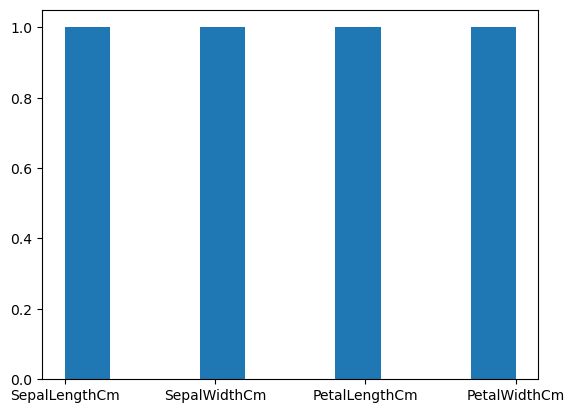

In [71]:
#12 . plot histogram of all input features
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.hist(features)
plt.show()

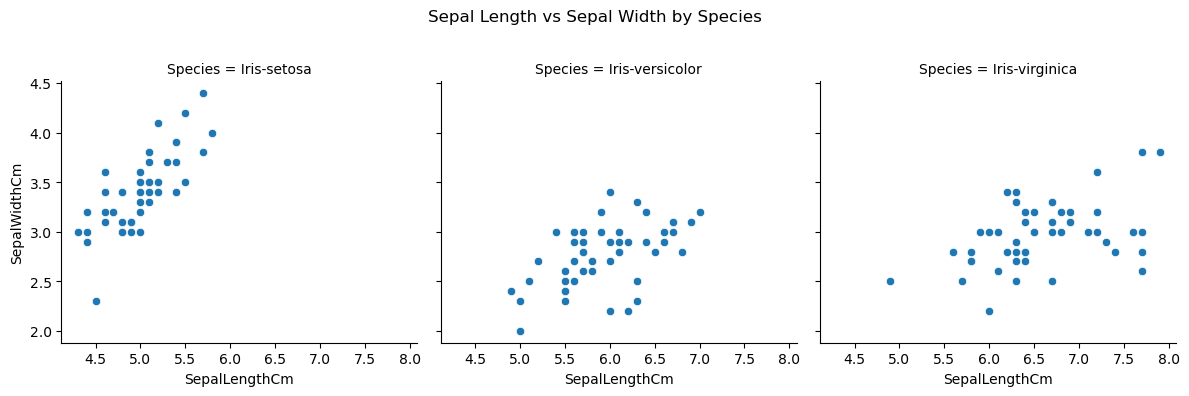

In [91]:
#13. create a scatter plot of sepallengthcm vs sepalwidth using facegrid
g = sns.FacetGrid(df, col="Species", height=4)
g.map_dataframe(sns.scatterplot, x="SepalLengthCm", y="SepalWidthCm")

# Add title
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Sepal Length vs Sepal Width by Species")

# Show plot
plt.show()


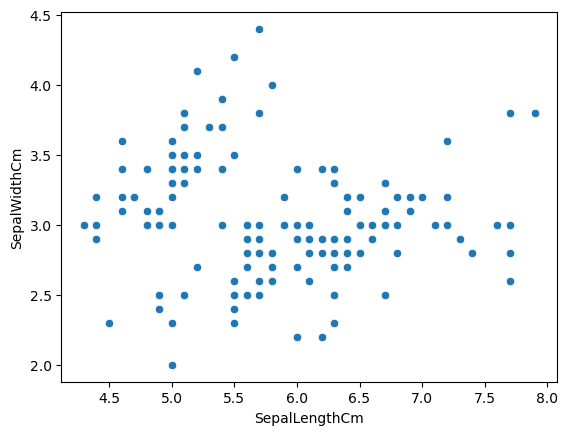

In [96]:
#12. create a scatter plot of sepallength vs sepalwidth
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"])
plt.show()

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

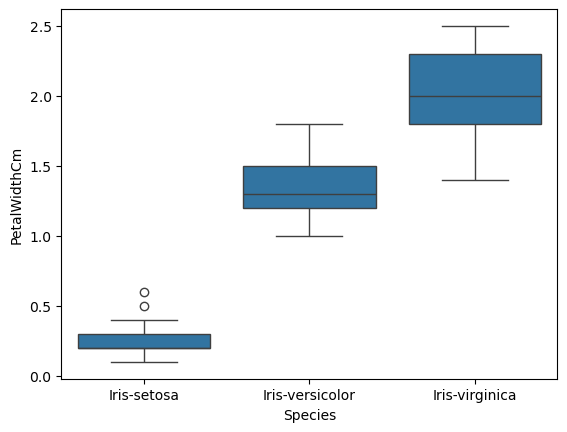

In [106]:
#15. Boxplot of petalwidth for different species
sns.boxplot(data = df,x = 'Species',y = 'PetalWidthCm' )

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

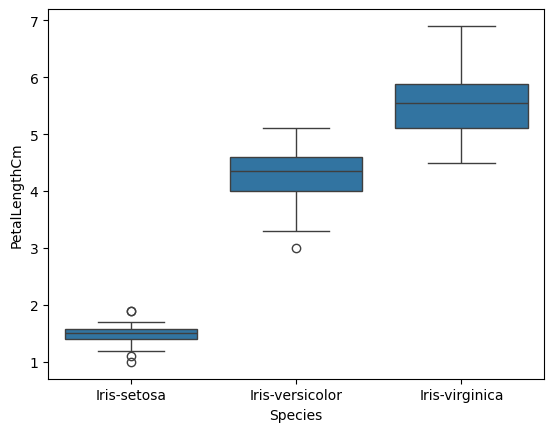

In [111]:
#16. Boxplot  of petallength for diff species
sns.boxplot(df,x = 'Species' ,y = 'PetalLengthCm' )

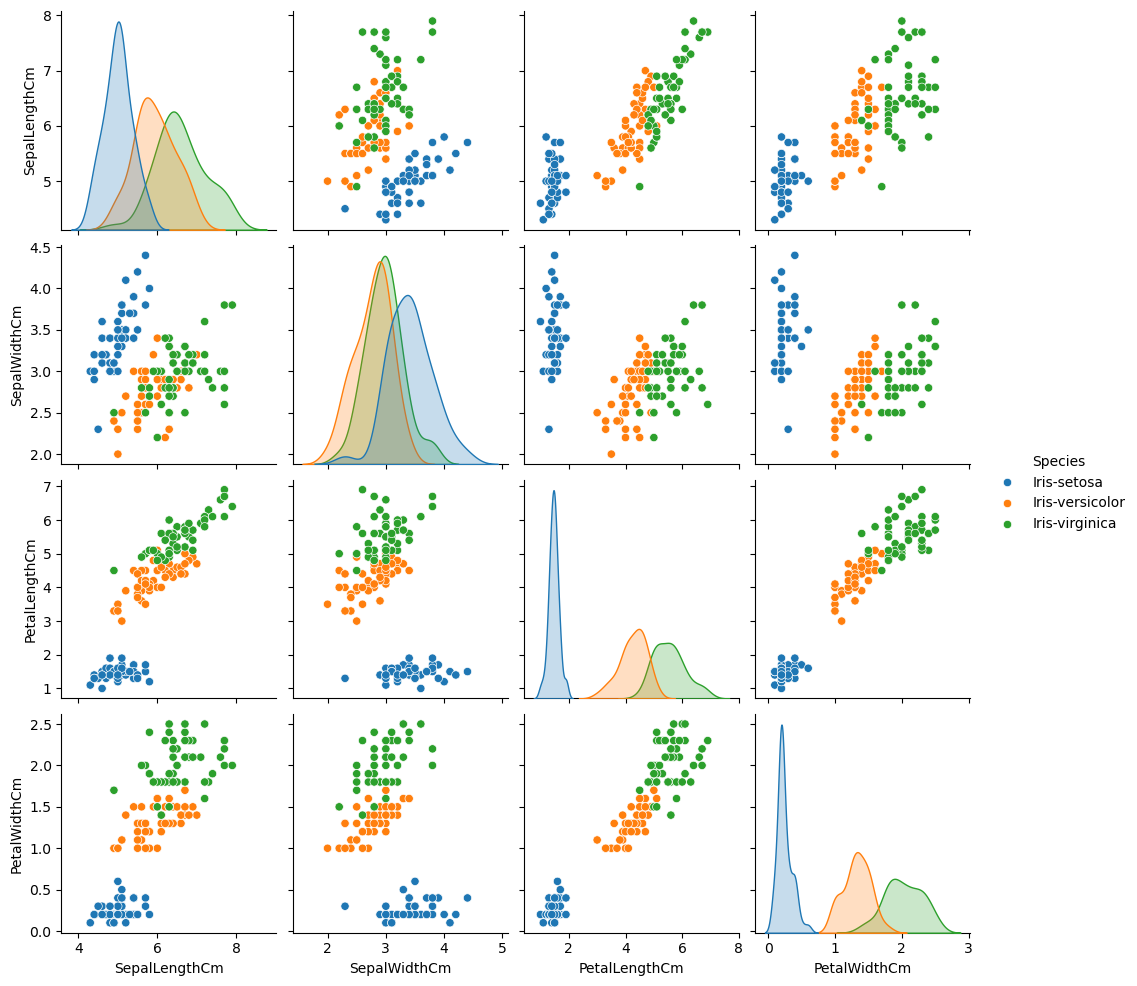

In [120]:
#17 .  pairplot of all input features closed by species
sns.pairplot(df,hue='Species')
plt.show()

In [126]:
#18 . print the correlation among diff features 
cor_matrix = df.corr(numeric_only=True)
cor_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [129]:
#19. prepare x and y 
x = df.drop(columns = ['Species'])
y = df['Species']


In [131]:
#20. split into train and test data 70 train random state -1
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=1)

In [133]:
#21. look at the documentation of the svc class that you will use to create the model
from sklearn.svm import SVC

help(SVC)


Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [142]:
#22.  Model building 
from sklearn.svm import SVC

In [143]:
#23. instatiate an object of class CSVSC using cost c =1
model = SVC(C=1)

In [146]:
#24. fit the model
model.fit(x_train,y_train)


SVC(C=1)

In [149]:
#25. predict using the model
y_pred = model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [153]:
#26. evaluation the model using confusion matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

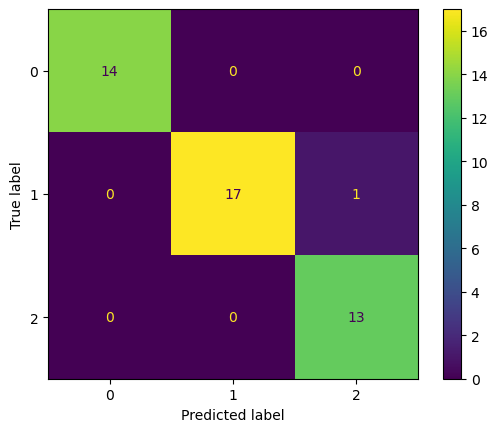

In [179]:
dis = ConfusionMatrixDisplay(cm)
dis.plot()

In [193]:
#27. print other metrics
report = classification_report(y_pred,y_test)
report

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        14\nIris-versicolor       0.94      1.00      0.97        17\n Iris-virginica       1.00      0.93      0.96        14\n\n       accuracy                           0.98        45\n      macro avg       0.98      0.98      0.98        45\n   weighted avg       0.98      0.98      0.98        45\n'

In [202]:
acc = accuracy_score(y_pred,y_test)
print(acc)

0.9777777777777777


In [204]:
f1 = f1_score(y_pred,y_test, average='macro')
f1

0.9781305114638448

In [208]:
pre = precision_score(y_pred,y_test,average='macro')
pre

0.9814814814814815